## Importing packages and libraries



In [12]:
import pandas as pd
import matplotlib

## Parsing forecast data

In [141]:
forecast_df = pd.read_csv('data/windpowerforecasts.dat', delimiter = ';')
forecast_df['dato'] = pd.to_datetime(forecast_df['dato'], format='%Y%m%d%H%M',)
forecast_df['dati'] = pd.to_datetime(forecast_df['dati'], format='%Y%m%d%H%M',)
forecast_df['time'] = forecast_df.dati.apply(lambda x: x.time())
forecast_df = forecast_df[forecast_df['time'] == pd.to_datetime('11:00').time()]
forecast_df = forecast_df[forecast_df['hors'] >= 13]
forecast_df = forecast_df[forecast_df['hors'] <= 36].reset_index()
forecast_df.head()

,index,dato,dati,hors,meas,fore,q5,10,q15,q20,...,q55,q60,q65,q70,q75,q80,q85,q90,q95,time
0,12,2017-01-01 00:00:00,2016-12-31 11:00:00,13,147661.0,140125.0,93021.0,113364.0,121591.0,127491.0,...,145251.0,147192.0,148860.0,149966.0,151718.0,153629.0,155355.0,157450.0,159124.0,11:00:00
1,13,2017-01-01 01:00:00,2016-12-31 11:00:00,14,144796.0,140072.0,93826.0,113072.0,122431.0,128560.0,...,144680.0,146879.0,148746.0,150810.0,152309.0,152901.0,155807.0,156437.0,159165.0,11:00:00
2,14,2017-01-01 02:00:00,2016-12-31 11:00:00,15,138824.0,139922.0,89320.0,110616.0,121376.0,127036.0,...,144201.0,145820.0,148247.0,149198.0,151067.0,151809.0,155331.0,156564.0,158004.0,11:00:00
3,15,2017-01-01 03:00:00,2016-12-31 11:00:00,16,139307.0,138918.0,99583.0,113112.0,120673.0,126154.0,...,141938.0,143031.0,145324.0,146850.0,149517.0,151052.0,154348.0,156340.0,157048.0,11:00:00
4,16,2017-01-01 04:00:00,2016-12-31 11:00:00,17,139602.0,140334.0,101889.0,115836.0,122214.0,126796.0,...,143112.0,144920.0,146944.0,148646.0,151688.0,153219.0,154648.0,155016.0,156961.0,11:00:00


In [145]:
forecast_df['meas'][0]/1000

147.661

## Parsing data of Day-ahead prices for 2016 and 2017

In [25]:
prices_dayahead_2016_raw_data = pd.read_html('data/elspot-prices_2016_hourly_dkk.xls')[0].values
prices_dayahead_2016 = pd.DataFrame(prices_dayahead_2016_raw_data)
prices_dayahead_2016 = prices_dayahead_2016.drop([2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19],axis=1)
prices_dayahead_2016.columns = ['Dates', 'Hours', 'DK1']
prices_dayahead_2016['Hours'] = prices_dayahead_2016['Hours'].str.slice(stop=2)
prices_dayahead_2016['ts'] = pd.to_datetime(prices_dayahead_2016['Dates'] + prices_dayahead_2016['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_dayahead_2016 = prices_dayahead_2016.drop(['Dates','Hours'],axis=1)
prices_dayahead_2016['DK1'] = prices_dayahead_2016['DK1']/100
prices_dayahead_2016 = prices_dayahead_2016.set_index('ts')
prices_dayahead_2016.head()

,DK1
ts,
2016-01-01 00:00:00,122.29
2016-01-01 01:00:00,119.68
2016-01-01 02:00:00,117.44
2016-01-01 03:00:00,116.18
2016-01-01 04:00:00,115.43


In [26]:
prices_dayahead_2017_raw_data = pd.read_html('data/elspot-prices_2017_hourly_dkk.xls')[0].values
prices_dayahead_2017 = pd.DataFrame(prices_dayahead_2017_raw_data)
prices_dayahead_2017 = prices_dayahead_2017.drop([2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18],axis=1)
prices_dayahead_2017.columns = ['Dates', 'Hours', 'DK1']
prices_dayahead_2017['Hours'] = prices_dayahead_2017['Hours'].str.slice(stop=2)
prices_dayahead_2017['ts'] = pd.to_datetime(prices_dayahead_2017['Dates'] + prices_dayahead_2017['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_dayahead_2017 = prices_dayahead_2017.drop(['Dates','Hours'],axis=1)
prices_dayahead_2017['DK1'] = prices_dayahead_2017['DK1']/100
prices_dayahead_2017 = prices_dayahead_2017.set_index('ts')
prices_dayahead_2017.head()

,DK1
ts,
2017-01-01 00:00:00,155.82
2017-01-01 01:00:00,155.37
2017-01-01 02:00:00,134.78
2017-01-01 03:00:00,119.17
2017-01-01 04:00:00,122.14


## Parsing data of Regulating market prices for 2016 and 2017

In [34]:
prices_regulating_2016_raw_data = pd.read_html('data/regulating-prices_2016_hourly_dkk.xls')[0].values
prices_regulating_2016 = pd.DataFrame(prices_regulating_2016_raw_data)
prices_regulating_2016 = prices_regulating_2016.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25],axis=1)
prices_regulating_2016.columns = ['Dates', 'Hours', 'DK1_up', 'DK1_down']
prices_regulating_2016['Hours'] = prices_regulating_2016['Hours'].str.slice(stop=2)
prices_regulating_2016['ts'] = pd.to_datetime(prices_regulating_2016['Dates'] + prices_regulating_2016['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_regulating_2016 = prices_regulating_2016.drop(['Dates','Hours'],axis=1)
prices_regulating_2016['DK1_up'] = prices_regulating_2016['DK1_up']/100
prices_regulating_2016['DK1_down'] = prices_regulating_2016['DK1_down']/100
prices_regulating_2016 = prices_regulating_2016.set_index('ts')
prices_regulating_2016.head()

,DK1_up,DK1_down
ts,,
2016-01-01 00:00:00,126.85,122.29
2016-01-01 01:00:00,126.85,119.68
2016-01-01 02:00:00,117.44,117.44
2016-01-01 03:00:00,116.18,116.18
2016-01-01 04:00:00,115.43,115.43


In [35]:
prices_regulating_2017_raw_data = pd.read_html('data/regulating-prices_2017_hourly_dkk.xls')[0].values
prices_regulating_2017 = pd.DataFrame(prices_regulating_2017_raw_data)
prices_regulating_2017 = prices_regulating_2017.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25],axis=1)
prices_regulating_2017.columns = ['Dates', 'Hours', 'DK1_up', 'DK1_down']
prices_regulating_2017['Hours'] = prices_regulating_2017['Hours'].str.slice(stop=2)
prices_regulating_2017['ts'] = pd.to_datetime(prices_regulating_2017['Dates'] + prices_regulating_2017['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_regulating_2017 = prices_regulating_2017.drop(['Dates','Hours'],axis=1)
prices_regulating_2017['DK1_up'] = prices_regulating_2017['DK1_up']/100
prices_regulating_2017['DK1_down'] = prices_regulating_2017['DK1_down']/100
prices_regulating_2017 = prices_regulating_2017.set_index('ts')
prices_regulating_2017.head()

,DK1_up,DK1_down
ts,,
2017-01-01 00:00:00,155.79,114.39
2017-01-01 01:00:00,186.17,155.34
2017-01-01 02:00:00,186.17,134.75
2017-01-01 03:00:00,119.15,119.15
2017-01-01 04:00:00,122.12,122.12


## Joining price data in single dataframe

In [64]:
prices_regulating = pd.concat([prices_regulating_2016, prices_regulating_2017])
prices_dayahed = pd.concat([prices_dayahead_2016, prices_dayahead_2017])
prices = prices_dayahed.join(prices_regulating)
prices.head()

,DK1,DK1_up,DK1_down
ts,,,
2016-01-01 00:00:00,122.29,126.85,122.29
2016-01-01 01:00:00,119.68,126.85,119.68
2016-01-01 02:00:00,117.44,117.44,117.44
2016-01-01 03:00:00,116.18,116.18,116.18
2016-01-01 04:00:00,115.43,115.43,115.43


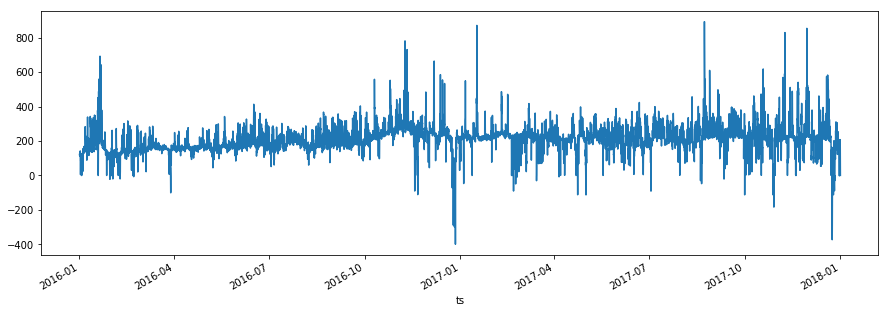

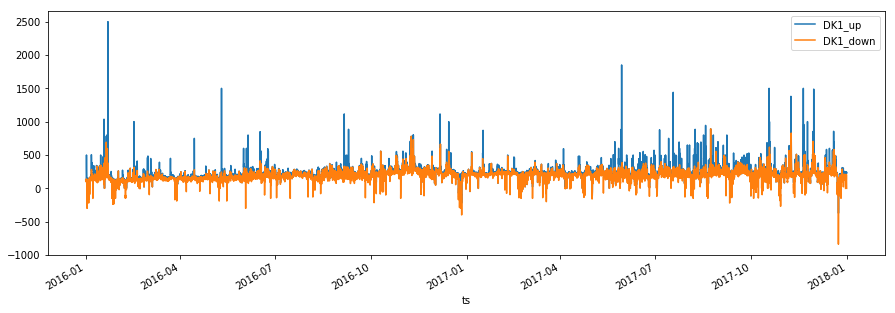

In [65]:
prices['DK1'].plot(figsize=(15,5))
prices.drop(columns=['DK1']).plot(figsize=(15,5))

## Parsing historical data from wind generation

In [73]:
wind_power_2016_raw_data = pd.read_html('data/wind-power-dk_2016_hourly.xls')[0].values
wind_power_2016 = pd.DataFrame(wind_power_2016_raw_data)
wind_power_2016 = wind_power_2016.drop([3],axis=1)
wind_power_2016.columns = ['Dates', 'Hours', 'DK1']
wind_power_2016['Hours'] = wind_power_2016['Hours'].str.slice(stop=2)
wind_power_2016['ts'] = pd.to_datetime(wind_power_2016['Dates'] + wind_power_2016['Hours'] + ':00', format='%d-%m-%Y%H:%M')
wind_power_2016 = wind_power_2016.drop(['Dates','Hours'],axis=1)
wind_power_2016 = wind_power_2016.set_index('ts')
wind_power_2016.head()

,DK1
ts,
2016-01-01 00:00:00,1314
2016-01-01 01:00:00,1267
2016-01-01 02:00:00,1159
2016-01-01 03:00:00,1160
2016-01-01 04:00:00,1069


## Strategy 1 - Based on historical data

In [162]:
prices2016 = prices[prices.index.year == 2016]
prices2016['Up'] = ((prices2016['DK1'] == prices2016['DK1_up']) & (prices2016['DK1_down'] != prices2016['DK1_up']))
prices2016['Down'] = ((prices2016['DK1'] == prices2016['DK1_down']) & (prices2016['DK1_down'] != prices2016['DK1_up']))
prices2016['Balance'] = (prices2016['DK1_up'] == prices2016['DK1_down'])
prices2016

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,DK1,DK1_up,DK1_down,Up,Down,Balance
ts,,,,,,
2016-01-01 00:00:00,122.29,126.85,122.29,False,True,False
2016-01-01 01:00:00,119.68,126.85,119.68,False,True,False
2016-01-01 02:00:00,117.44,117.44,117.44,False,False,True
2016-01-01 03:00:00,116.18,116.18,116.18,False,False,True
2016-01-01 04:00:00,115.43,115.43,115.43,False,False,True
2016-01-01 05:00:00,117.52,117.52,117.52,False,False,True
2016-01-01 06:00:00,114.61,114.61,114.61,False,False,True
2016-01-01 07:00:00,114.68,114.68,97.07,True,False,False
2016-01-01 08:00:00,113.34,113.34,97.07,True,False,False
